In [92]:
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv("C:/Users/Rishabh Johri/Downloads/data.csv")

In [94]:
df.head()

,Age,Sex,Height,Weight,Job,ExerciseFrequency,ExerciseToughness,Necessary Screen Time,ProductiveScreenTime,SocialMedia,VideoGames,OnlineShopping,Binge Watching,Ebooks,OptimumScreenTime,NumberOfDevices,HumanInteraction,sleep
0,teen,Female,1.600,50.0,Student,never,4,9,7,3,5,4,6,4,5,2,1,6 to 8 hours
1,teen,Female,1.575,77.0,Science and Technology,3 to 5 days a week,6,8,6,1,0,0,2,0,5,2,3,6 to 8 hours
2,young,Female,1.651,50.0,Student,3 to 5 days a week,8,6,6,1,0,0,1,2,5,3,3,6 to 8 hours
3,teen,Female,1.626,80.0,"Glamour industry (modelling , acting , music ,...",never,0,10,10,10,10,10,10,10,10,10,10,more than 8 hours
4,young,Male,1.829,62.0,Student,Once every day,4,9,4,1,0,1,1,1,6,3,2,6 to 8 hours


In [95]:
# bmi = w(kg) / h(m)^2
BMI = df['Weight'] / (df['Height'])**2
BMI

0      19.531250
1      31.040564
2      18.343232
3      30.258605
4      18.533792
         ...    
253    24.140587
254    22.693954
255    21.875000
256    23.381204
257    20.712482
Length: 258, dtype: float64

In [100]:
# if bmi < 18 : underweight
# if bmi 18 to 25 : normal
# if bmi 25 to 30 : overweight
# if bmi > 30 : obese
a = []
for i in BMI:
    if i <18 :
        a.append("underweight")
    elif i<25 :
        a.append("normal")
    elif i<30 :
        a.append("overweight")
    else:
        a.append("obese")
    
arr = np.array(a)
df['BMI'] = arr

In [101]:
df.drop(['Height', 'Weight'] , axis = 1 , inplace = True)

In [102]:
df

,Age,Sex,Job,ExerciseFrequency,ExerciseToughness,Necessary Screen Time,ProductiveScreenTime,SocialMedia,VideoGames,OnlineShopping,Binge Watching,Ebooks,OptimumScreenTime,NumberOfDevices,HumanInteraction,sleep,BMI
0,teen,Female,Student,never,4,9,7,3,5,4,6,4,5,2,1,6 to 8 hours,normal
1,teen,Female,Science and Technology,3 to 5 days a week,6,8,6,1,0,0,2,0,5,2,3,6 to 8 hours,obese
2,young,Female,Student,3 to 5 days a week,8,6,6,1,0,0,1,2,5,3,3,6 to 8 hours,normal
3,teen,Female,"Glamour industry (modelling , acting , music ,...",never,0,10,10,10,10,10,10,10,10,10,10,more than 8 hours,obese
4,young,Male,Student,Once every day,4,9,4,1,0,1,1,1,6,3,2,6 to 8 hours,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,old,Male,Marketing,3 to 5 days a week,6,3,2,1,1,0,0,2,3,2,5,less than 6 hours,normal
254,young,Female,Social media based industry ( instagram influe...,Once every day,6,6,2,2,0,1,2,1,3,3,3,less than 6 hours,normal
255,old,Female,"Academic (Professor , Teachers , etc)",3 to 5 days a week,8,4,3,1,0,0,1,3,3,2,4,less than 6 hours,normal
256,young,Female,Design and Architecture,rarely,1,8,5,4,2,3,4,2,6,4,6,6 to 8 hours,normal


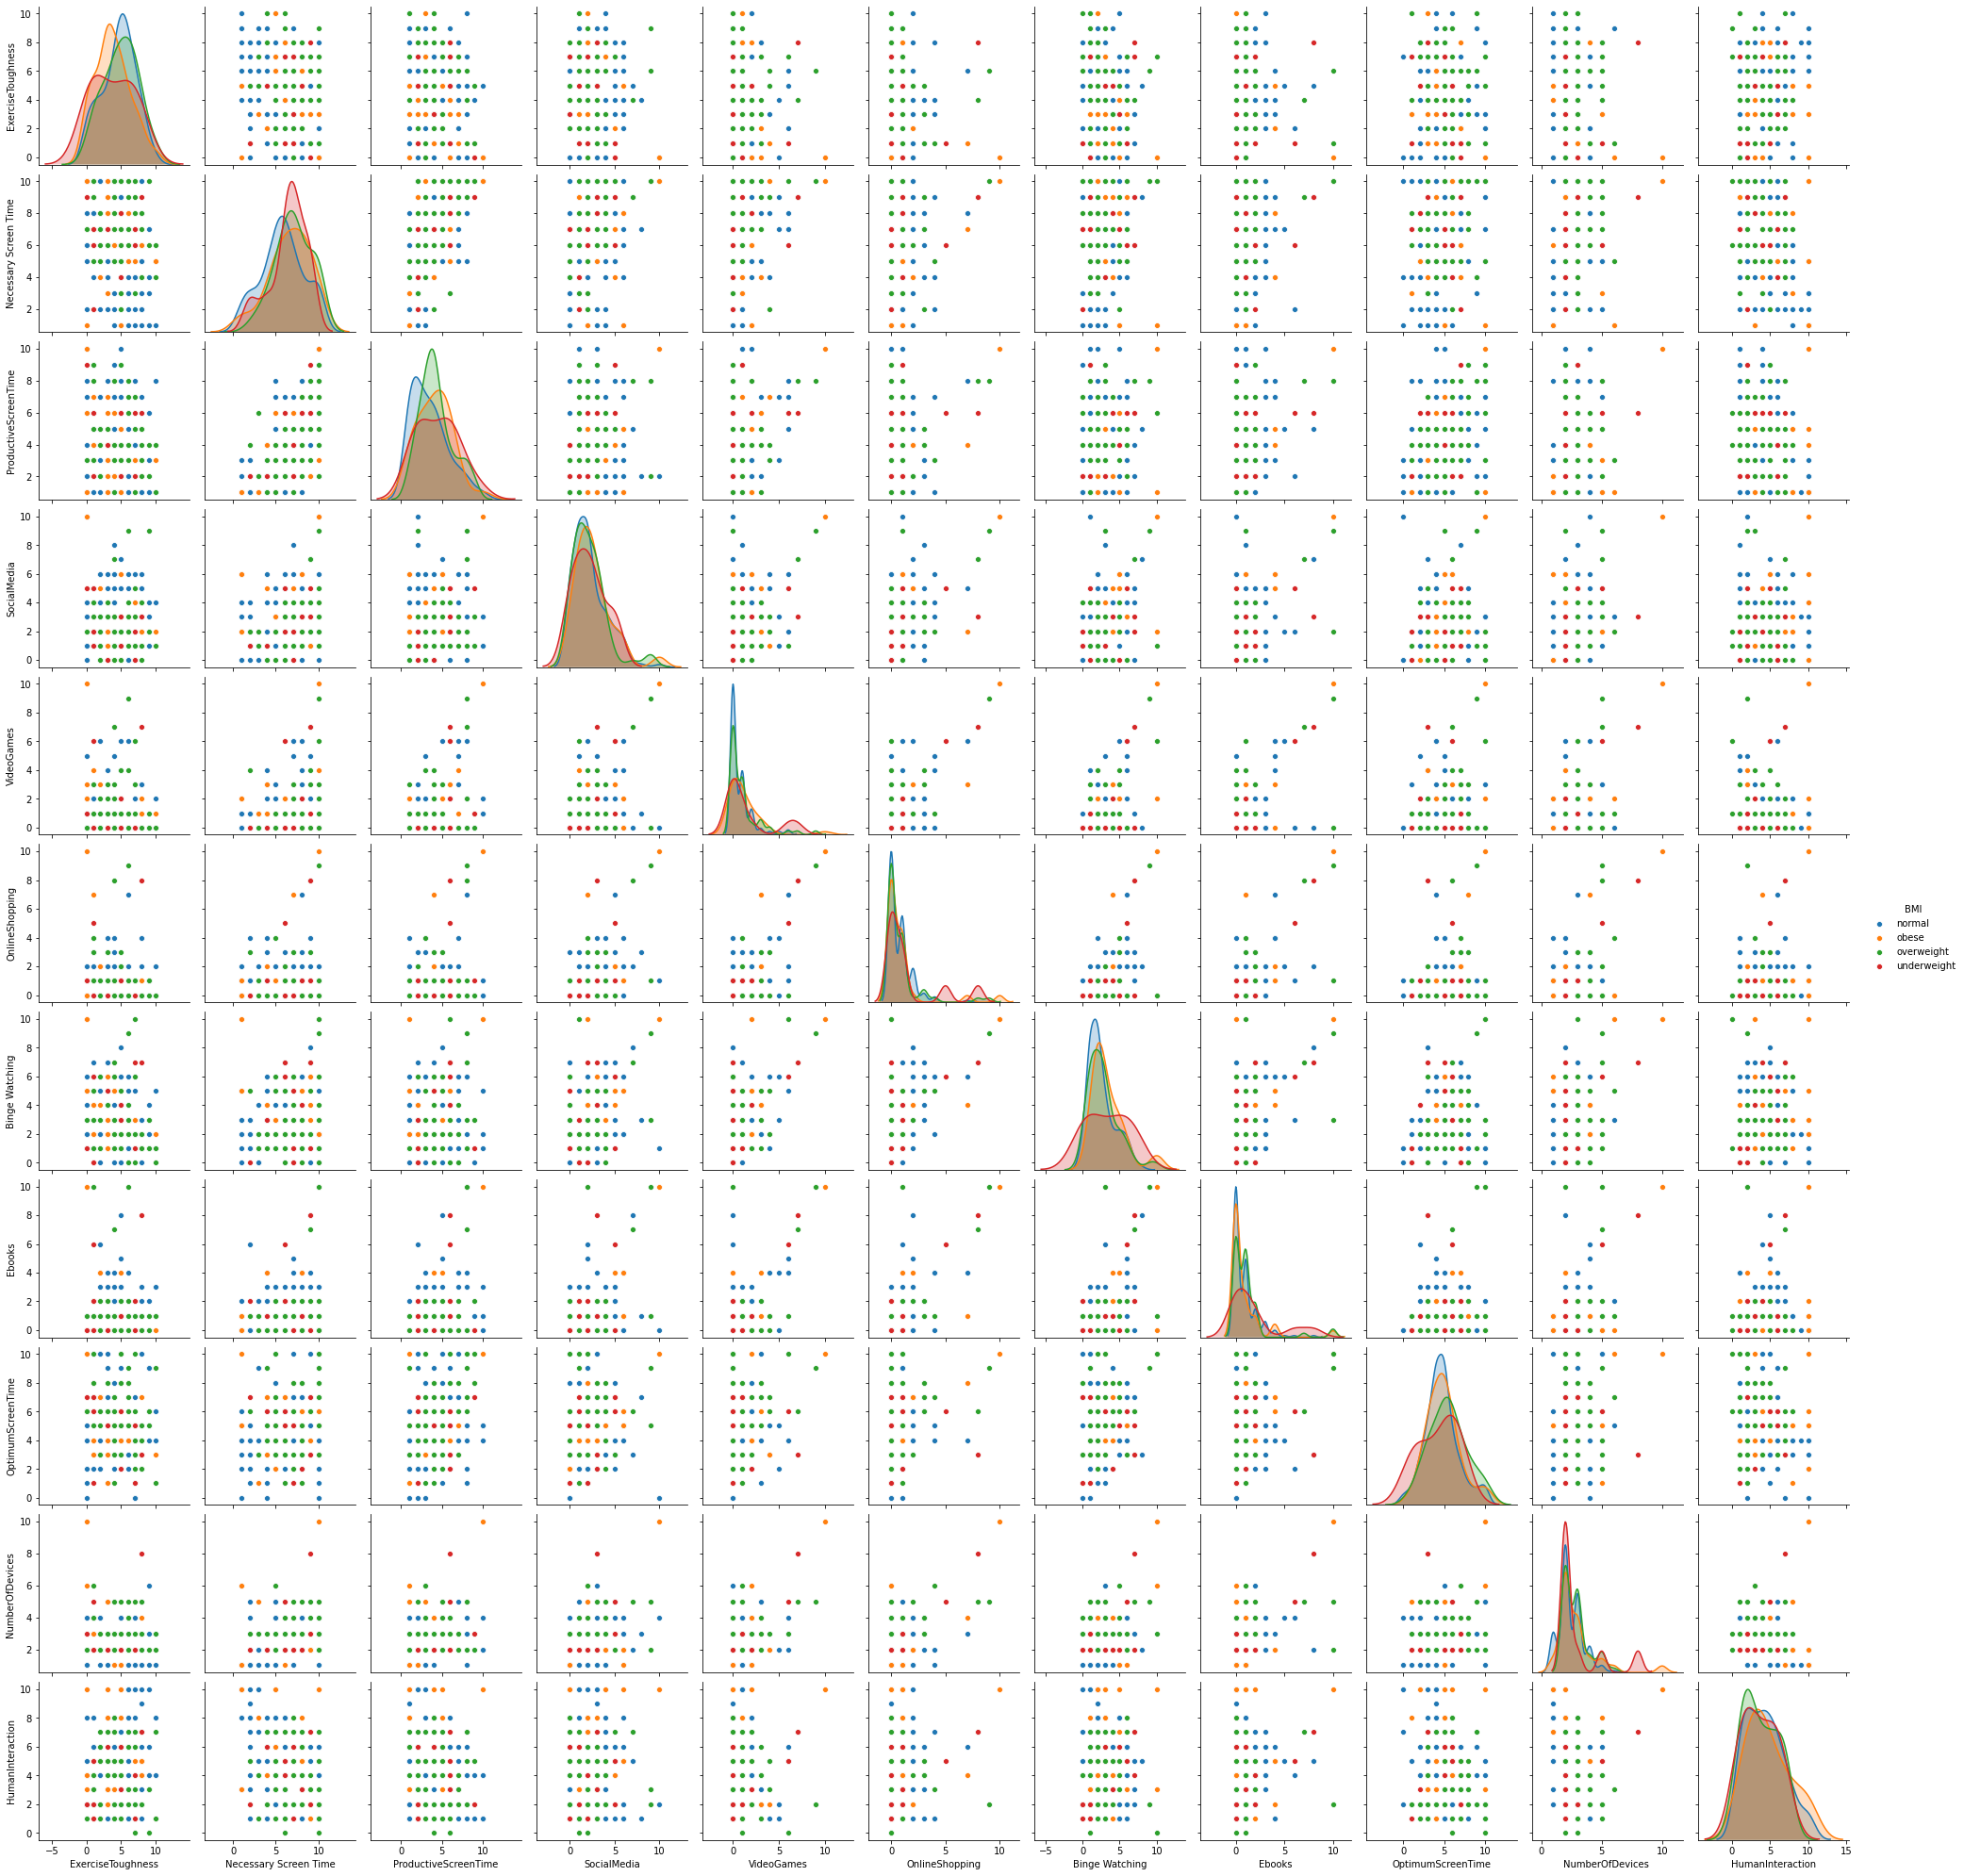

In [103]:
import seaborn as sns
%matplotlib inline
sns.pairplot(df,hue='BMI')

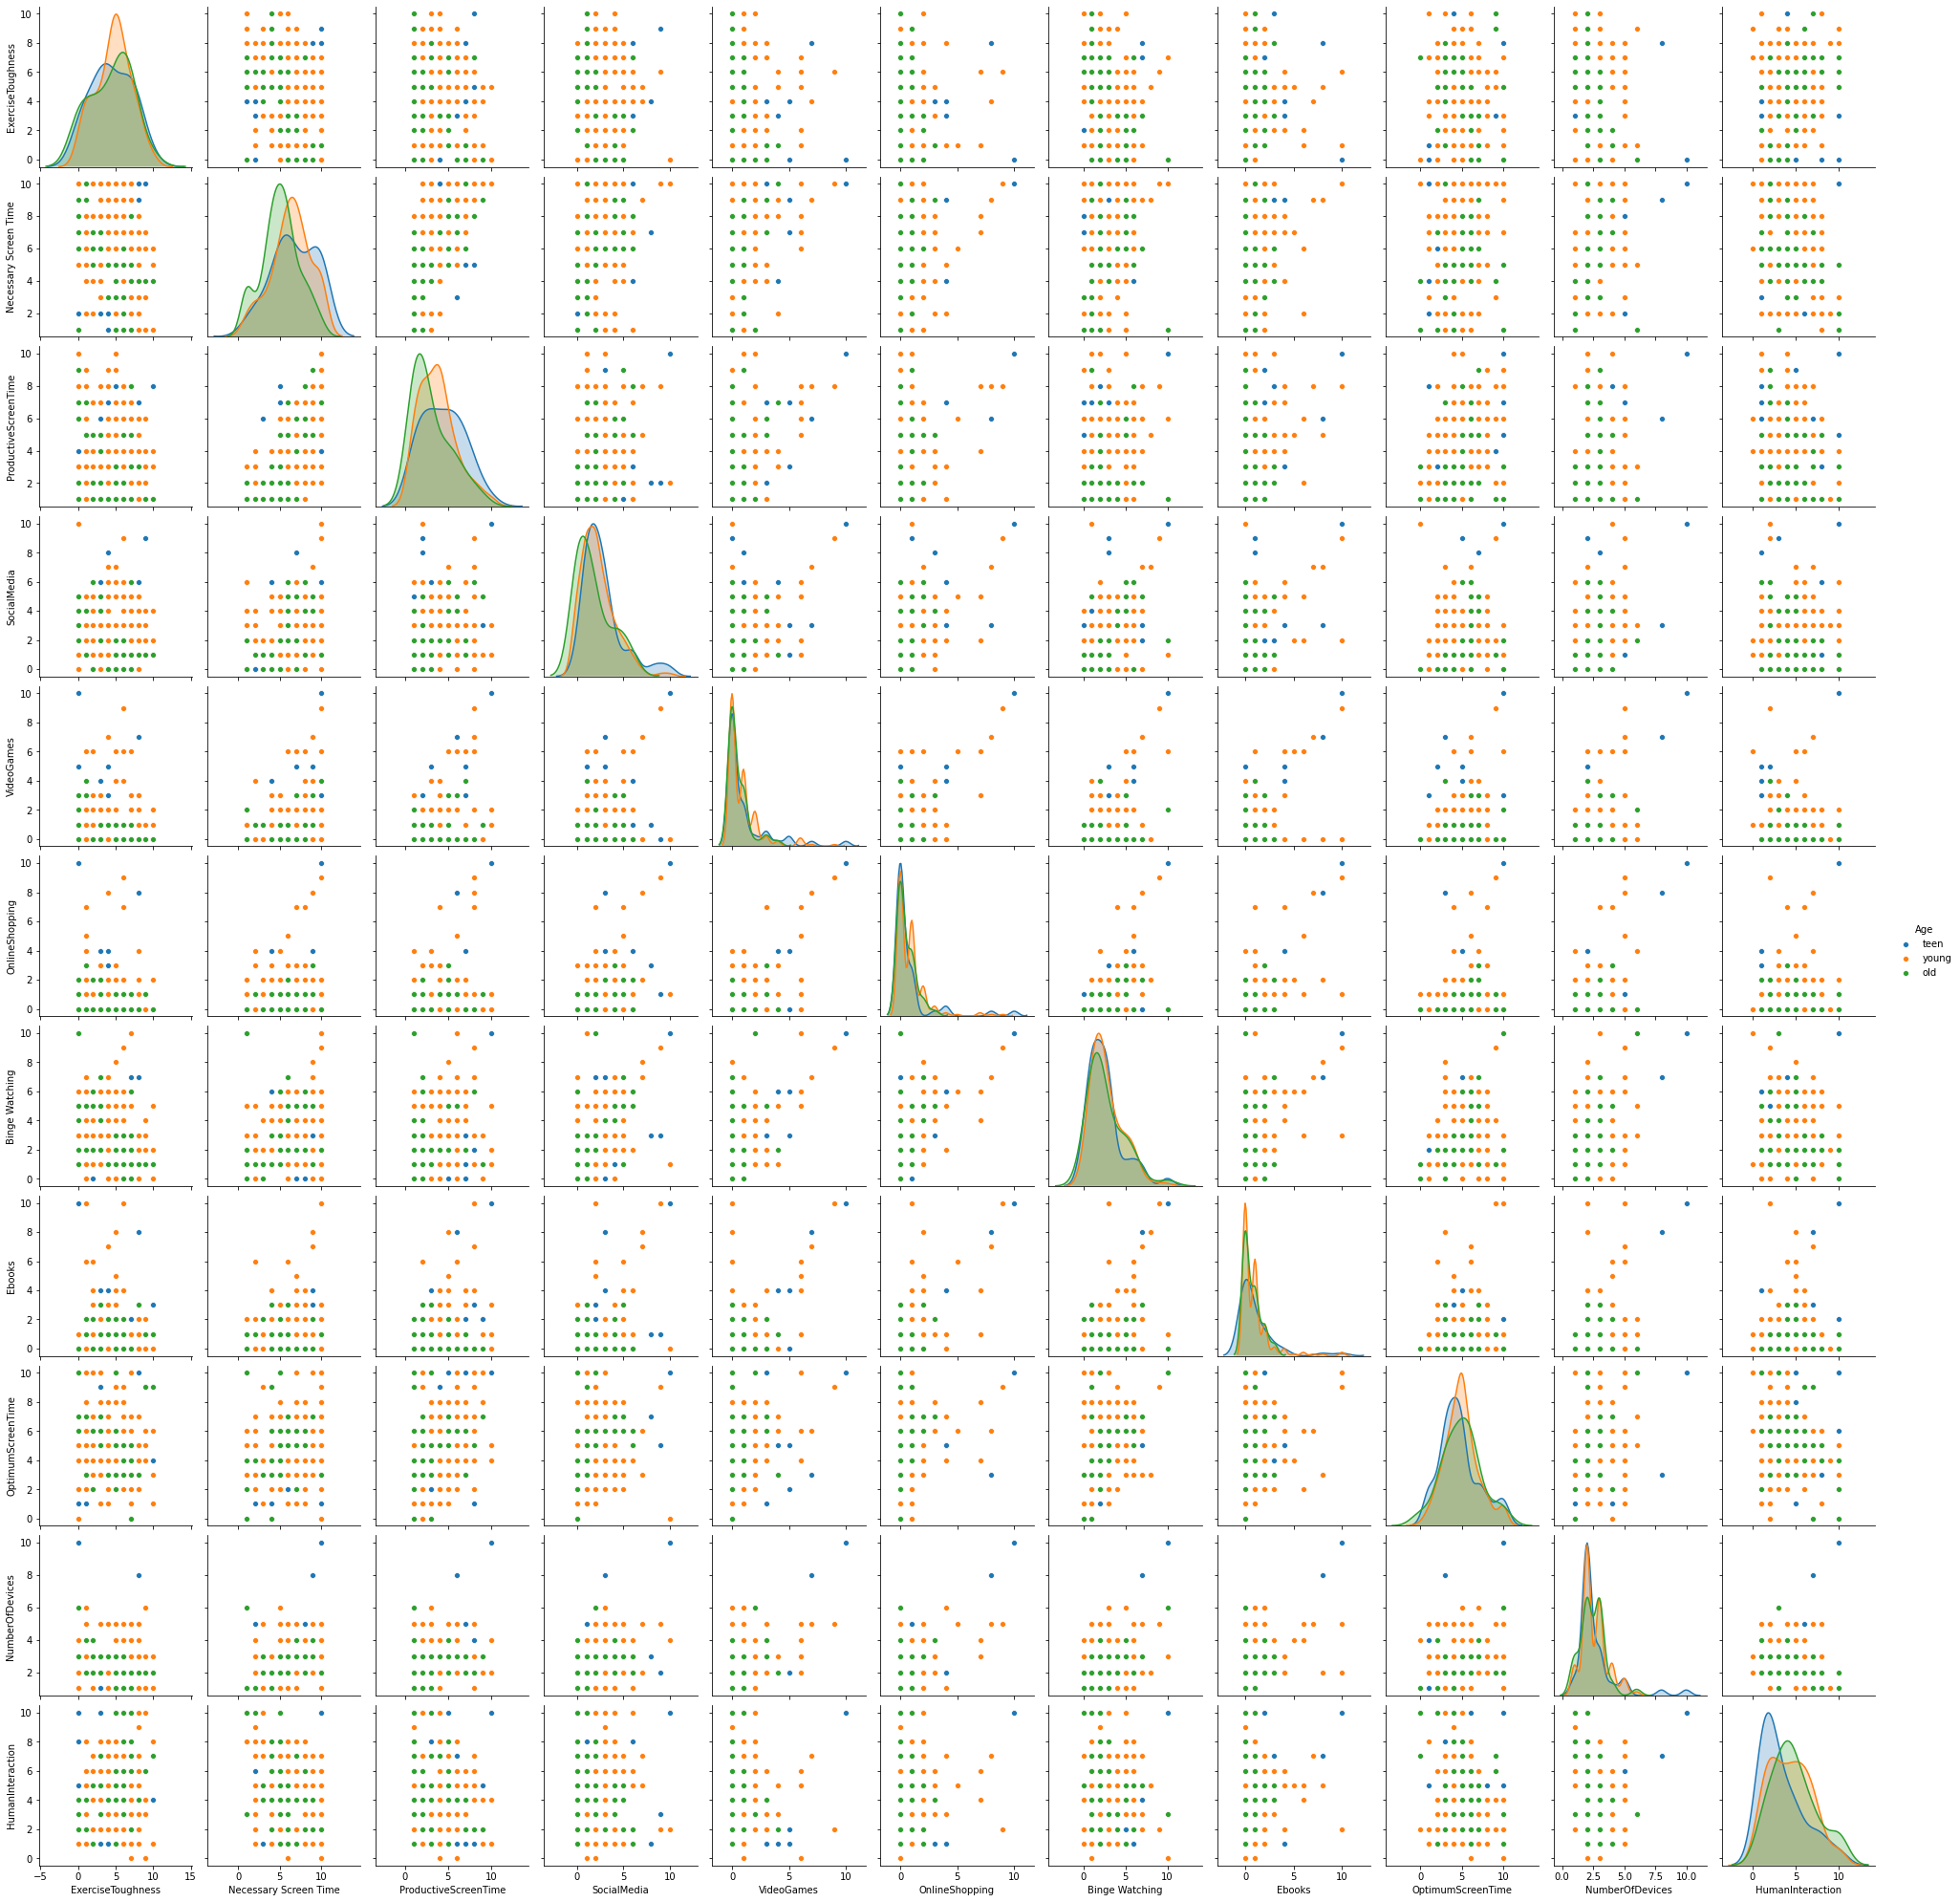

In [106]:
%matplotlib inline
sns.pairplot(df,hue='Age')

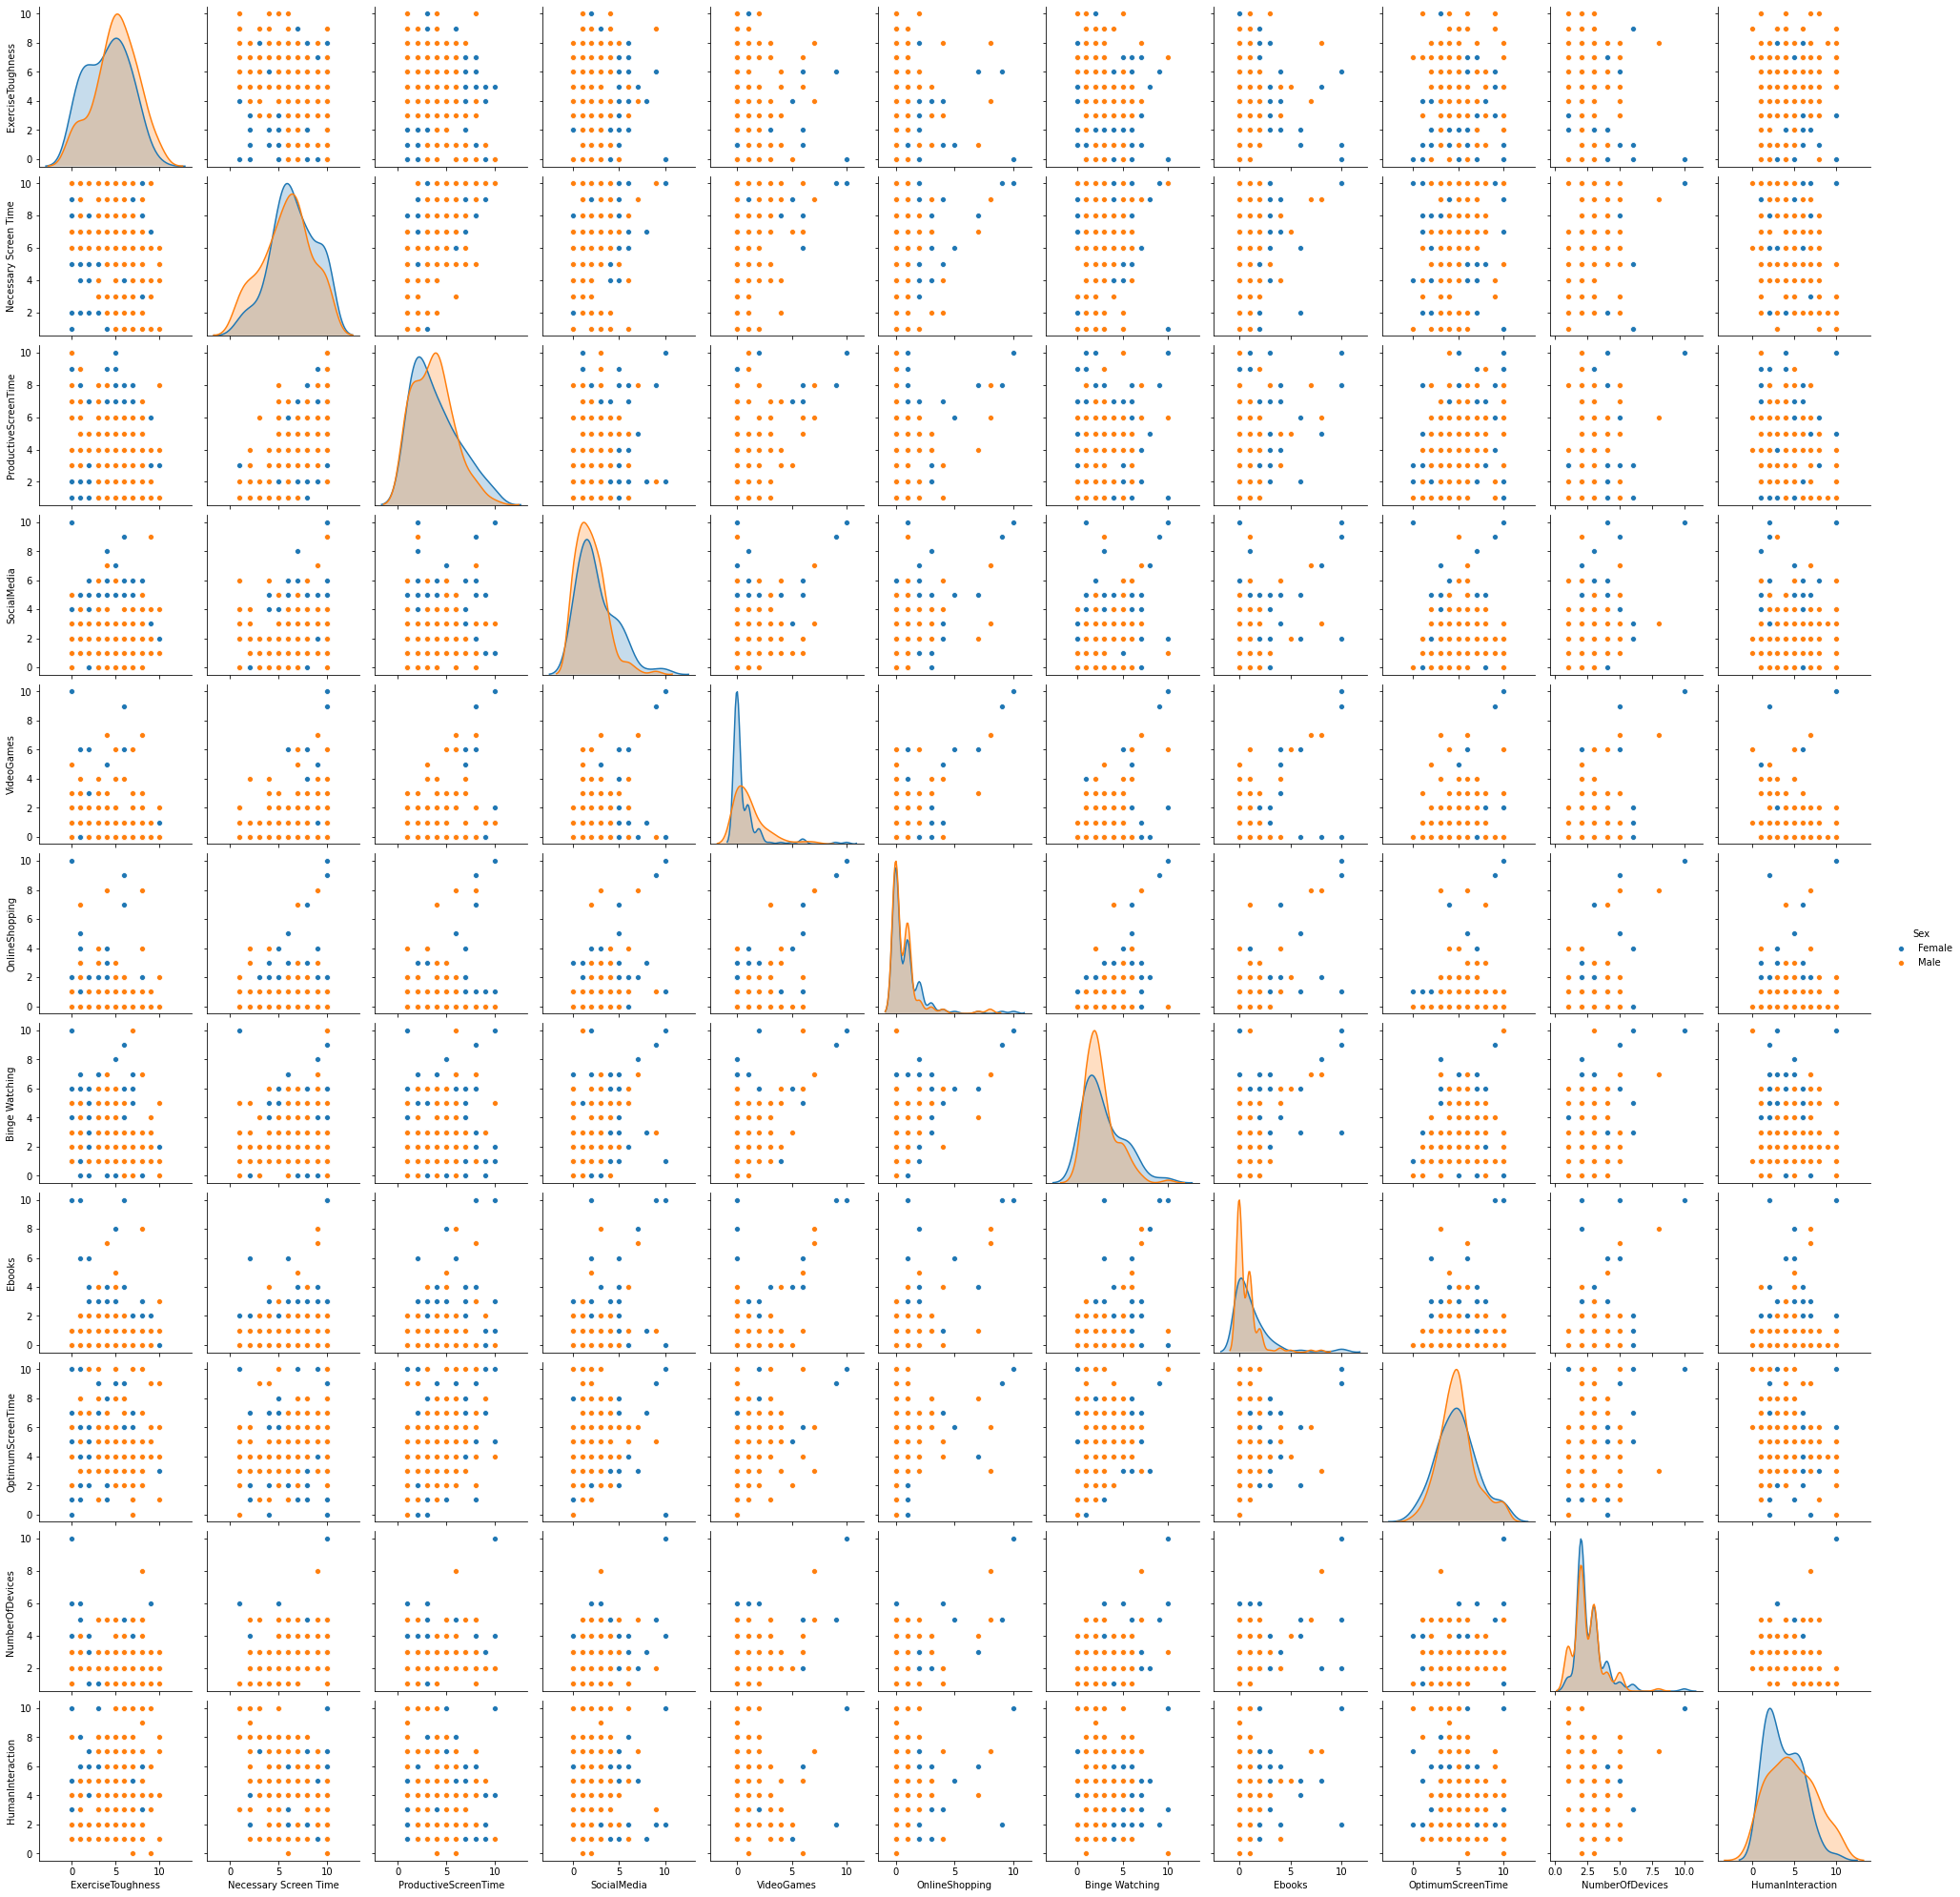

In [107]:
%matplotlib inline
sns.pairplot(df,hue='Sex')

In [115]:
# Apriori Algorithm

In [116]:
from mlxtend.frequent_patterns import association_rules, apriori

In [119]:
transactions_str = df.groupby(['Job','BMI'])['BMI'].count().reset_index(name ='Count')
transactions_str

,Job,BMI,Count
0,"Academic (Professor , Teachers , etc)",normal,1
1,"Academic (Professor , Teachers , etc)",overweight,2
2,"Academic (Professor , Teachers , etc);Design a...",overweight,1
3,Bureaucracy,normal,5
4,Bureaucracy,obese,3
...,...,...,...
76,Student,underweight,2
77,Student;Freelancer,obese,1
78,Student;Freelancer;Social media based industry...,overweight,1
79,fitness industry,normal,3


In [120]:
my_basket = transactions_str.pivot_table(index='Job', columns='BMI', values='Count', aggfunc='sum').fillna(0)
my_basket.head()

BMI,normal,obese,overweight,underweight
Job,,,,
"Academic (Professor , Teachers , etc)",1.0,0.0,2.0,0.0
"Academic (Professor , Teachers , etc);Design and Architecture",0.0,0.0,1.0,0.0
Bureaucracy,5.0,3.0,0.0,0.0
Bureaucracy;Defence / law enforcement,1.0,0.0,0.0,0.0
Bureaucracy;Finance;Legal,1.0,0.0,0.0,0.0


In [121]:
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()


BMI,normal,obese,overweight,underweight
Job,,,,
"Academic (Professor , Teachers , etc)",1,0,1,0
"Academic (Professor , Teachers , etc);Design and Architecture",0,0,1,0
Bureaucracy,1,1,0,0
Bureaucracy;Defence / law enforcement,1,0,0,0
Bureaucracy;Finance;Legal,1,0,0,0


In [122]:
# using the 'apriori algorithm' with min_support=0.01 (1% of 9465)
# It means the item should be present in atleast 94 transaction out of 9465 transactions only when we considered that item in
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

,support,itemsets
0,0.703704,(normal)
1,0.296296,(obese)
2,0.388889,(overweight)
3,0.111111,(underweight)
4,0.185185,"(obese, normal)"
5,0.203704,"(normal, overweight)"
6,0.092593,"(underweight, normal)"
7,0.111111,"(obese, overweight)"
8,0.074074,"(obese, underweight)"
9,0.074074,"(underweight, overweight)"


In [123]:
# now making the rules from frequent itemset generated above

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(obese, underweight, overweight)",(normal),0.055556,0.703704,0.055556,1.000000,1.421053,0.016461,inf
19,"(underweight, overweight)",(normal),0.074074,0.703704,0.074074,1.000000,1.421053,0.021948,inf
12,"(obese, underweight)",(normal),0.074074,0.703704,0.074074,1.000000,1.421053,0.021948,inf
0,(underweight),(normal),0.111111,0.703704,0.092593,0.833333,1.184211,0.014403,1.777778
7,"(obese, overweight)",(normal),0.111111,0.703704,0.092593,0.833333,1.184211,0.014403,1.777778
14,"(underweight, normal)",(obese),0.092593,0.296296,0.074074,0.800000,2.700000,0.046639,3.518519
18,"(underweight, normal)",(overweight),0.092593,0.388889,0.074074,0.800000,2.057143,0.038066,3.055556
24,"(obese, underweight)",(overweight),0.074074,0.388889,0.055556,0.750000,1.928571,0.026749,2.444444
34,"(obese, underweight)","(normal, overweight)",0.074074,0.203704,0.055556,0.750000,3.681818,0.040466,3.185185
33,"(underweight, normal, overweight)",(obese),0.074074,0.296296,0.055556,0.750000,2.531250,0.033608,2.814815


In [124]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(obese, underweight, overweight)",(normal),0.055556,0.703704,0.055556,1.000000,1.421053,0.016461,inf
12,"(obese, underweight)",(normal),0.074074,0.703704,0.074074,1.000000,1.421053,0.021948,inf
19,"(underweight, overweight)",(normal),0.074074,0.703704,0.074074,1.000000,1.421053,0.021948,inf
0,(underweight),(normal),0.111111,0.703704,0.092593,0.833333,1.184211,0.014403,1.777778
7,"(obese, overweight)",(normal),0.111111,0.703704,0.092593,0.833333,1.184211,0.014403,1.777778
14,"(underweight, normal)",(obese),0.092593,0.296296,0.074074,0.800000,2.700000,0.046639,3.518519
18,"(underweight, normal)",(overweight),0.092593,0.388889,0.074074,0.800000,2.057143,0.038066,3.055556
33,"(underweight, normal, overweight)",(obese),0.074074,0.296296,0.055556,0.750000,2.531250,0.033608,2.814815
38,"(underweight, overweight)","(obese, normal)",0.074074,0.185185,0.055556,0.750000,4.050000,0.041838,3.259259
26,"(underweight, overweight)",(obese),0.074074,0.296296,0.055556,0.750000,2.531250,0.033608,2.814815


In [129]:
transactions_str = df.groupby(['ExerciseFrequency','ExerciseToughness','BMI'])['BMI'].count().reset_index(name ='Count')
my_basket = transactions_str.pivot_table(index=['ExerciseFrequency','ExerciseToughness'], columns='BMI', values='Count', aggfunc='sum').fillna(0)
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

my_basket_sets = my_basket.applymap(encode)
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,"(obese, underweight)",(normal),0.071429,0.821429,0.071429,1.000000,1.217391,0.012755,inf
28,"(obese, underweight)",(overweight),0.071429,0.589286,0.071429,1.000000,1.696970,0.029337,inf
35,"(obese, underweight, overweight)",(normal),0.071429,0.821429,0.071429,1.000000,1.217391,0.012755,inf
23,"(underweight, overweight)",(normal),0.107143,0.821429,0.107143,1.000000,1.217391,0.019133,inf
34,"(obese, underweight, normal)",(overweight),0.071429,0.589286,0.071429,1.000000,1.696970,0.029337,inf
2,(underweight),(normal),0.142857,0.821429,0.142857,1.000000,1.217391,0.025510,inf
38,"(obese, underweight)","(normal, overweight)",0.071429,0.410714,0.071429,1.000000,2.434783,0.042092,inf
0,(obese),(normal),0.339286,0.821429,0.321429,0.947368,1.153318,0.042730,3.392857
11,"(obese, overweight)",(normal),0.250000,0.821429,0.232143,0.928571,1.130435,0.026786,2.500000
22,"(underweight, normal)",(overweight),0.142857,0.589286,0.107143,0.750000,1.272727,0.022959,1.642857


In [130]:
transactions_str = df.groupby(['Necessary Screen Time','BMI'])['BMI'].count().reset_index(name ='Count')
my_basket = transactions_str.pivot_table(index= 'Necessary Screen Time', columns='BMI', values='Count', aggfunc='sum').fillna(0)
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

my_basket_sets = my_basket.applymap(encode)
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(obese),(normal),0.9,1.0,0.9,1.000000,1.000000,0.00,inf
10,"(obese, underweight)",(normal),0.5,1.0,0.5,1.000000,1.000000,0.00,inf
23,"(obese, underweight, overweight)",(normal),0.5,1.0,0.5,1.000000,1.000000,0.00,inf
22,"(obese, underweight, normal)",(overweight),0.5,0.9,0.5,1.000000,1.111111,0.05,inf
18,"(obese, underweight)",(overweight),0.5,0.9,0.5,1.000000,1.111111,0.05,inf
15,(underweight),"(normal, overweight)",0.6,0.9,0.6,1.000000,1.111111,0.06,inf
13,"(underweight, overweight)",(normal),0.6,1.0,0.6,1.000000,1.000000,0.00,inf
25,"(obese, underweight)","(normal, overweight)",0.5,0.9,0.5,1.000000,1.111111,0.05,inf
12,"(underweight, normal)",(overweight),0.6,0.9,0.6,1.000000,1.111111,0.06,inf
8,"(obese, overweight)",(normal),0.8,1.0,0.8,1.000000,1.000000,0.00,inf


In [131]:
transactions_str = df.groupby(['ProductiveScreenTime','BMI'])['BMI'].count().reset_index(name ='Count')
my_basket = transactions_str.pivot_table(index='ProductiveScreenTime', columns='BMI', values='Count', aggfunc='sum').fillna(0)
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

my_basket_sets = my_basket.applymap(encode)
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(obese),(normal),0.8,1.0,0.8,1.000000,1.000000,0.00,inf
10,"(obese, underweight)",(normal),0.3,1.0,0.3,1.000000,1.000000,0.00,inf
23,"(obese, underweight, overweight)",(normal),0.3,1.0,0.3,1.000000,1.000000,0.00,inf
22,"(obese, underweight, normal)",(overweight),0.3,0.9,0.3,1.000000,1.111111,0.03,inf
18,"(obese, underweight)",(overweight),0.3,0.9,0.3,1.000000,1.111111,0.03,inf
15,(underweight),"(normal, overweight)",0.4,0.9,0.4,1.000000,1.111111,0.04,inf
13,"(underweight, overweight)",(normal),0.4,1.0,0.4,1.000000,1.000000,0.00,inf
25,"(obese, underweight)","(normal, overweight)",0.3,0.9,0.3,1.000000,1.111111,0.03,inf
12,"(underweight, normal)",(overweight),0.4,0.9,0.4,1.000000,1.111111,0.04,inf
8,"(obese, overweight)",(normal),0.7,1.0,0.7,1.000000,1.000000,0.00,inf


In [133]:
transactions_str = df.groupby(['SocialMedia','VideoGames','OnlineShopping','Binge Watching','Ebooks','BMI'])['BMI'].count().reset_index(name ='Count')
my_basket = transactions_str.pivot_table(index=['SocialMedia','VideoGames','OnlineShopping','Binge Watching','Ebooks'], columns='BMI', values='Count', aggfunc='sum').fillna(0)
def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

my_basket_sets = my_basket.applymap(encode)
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"(obese, overweight)",(normal),0.032086,0.657754,0.02139,0.666667,1.013550,0.000286,1.026738
0,"(obese, normal)",(overweight),0.042781,0.267380,0.02139,0.500000,1.870000,0.009952,1.465241
2,"(normal, overweight)",(obese),0.064171,0.155080,0.02139,0.333333,2.149425,0.011439,1.267380
3,(obese),"(normal, overweight)",0.155080,0.064171,0.02139,0.137931,2.149425,0.011439,1.085561
5,(overweight),"(obese, normal)",0.267380,0.042781,0.02139,0.080000,1.870000,0.009952,1.040456
4,(normal),"(obese, overweight)",0.657754,0.032086,0.02139,0.032520,1.013550,0.000286,1.000449
